In [1]:
# Set download URL
# You may want to check that this shows you 'raw' data if you
# get errors about the first line being HTML!
url = 'https://github.com/jreades/i2p/raw/master/data/src/2020-08-24-listings.csv.gz'

# your code here
import pandas as pd
df = pd.read_csv(url, compression='gzip', low_memory=False)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
# 0 for row, 1 for column

Data frame is 74,188 x 74


In [2]:
#df.info()

In [3]:
print(list(df.columns.values))
#check the data typy
print(type(df.columns)) #get columns name
print(type(df.values)) #get array
print(type(df.columns.values)) #get array of columns name

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [4]:
#save the data in to folder, so we dont have to reload it again.
import os
import pandas as pd
url = 'https://github.com/jreades/i2p/raw/master/data/src/2020-08-24-listings.csv.gz'
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         # .split() method: split based on '/'the str into items, and return a list.
print(type(url.split('/')))
print(f"Writing to: {fn}")

<class 'list'>
Writing to: 2020-08-24-listings.csv.gz


In [5]:
if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)      #create a file path 
# save the loaded data into a csv file, and don't save the index into csv

df.to_csv(os.path.join(path,fn), index=False) 
print("Done.")

Done.


In [6]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

In [7]:
#del(df)
#reload df from local file
df = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols, nrows=10000)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}") #shape show the size of data frame

Data frame is 10,000 x 42


In [8]:
df.sample(6, random_state=42)
# 6 rows, seed

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
6252,5611338.0,https://www.airbnb.com/rooms/5611338,2020-08-27,Lovely Flat close to Tower Bridge!,"´The flat is very spacious (1 bedroom, living ...",29021331.0,Sandra,2015-03-09,"Madrid, Community of Madrid, Spain","Hi! \r\n\r\nWe are Sandra and Pablo, a couple ...",...,2017-11-05,96.0,10.0,10.0,10.0,10.0,NaN,f,1.0,0.54
4684,4176912.0,https://www.airbnb.com/rooms/4176912,2020-08-26,B&B Smart Charming 2bed 6 Sleeper,<b>The space</b><br />PLEASE KINDLY ASK FOR AV...,1517803.0,Hilmi,2011-12-19,"London, United Kingdom",I am a young professional with an engineer bac...,...,2015-04-02,73.0,9.0,9.0,9.0,8.0,NaN,f,24.0,0.04
1731,1041523.0,https://www.airbnb.com/rooms/1041523,2020-08-26,Beautifully Spacious Property in Islington,This beautiful 1 bedroom property sits in the ...,5733781.0,Tomas,2013-04-02,London,I'm from London and like to travel,...,2020-01-21,95.0,10.0,10.0,9.0,10.0,NaN,f,1.0,0.73
4742,4225126.0,https://www.airbnb.com/rooms/4225126,2020-08-26,Lovely room on Shoreditch Park,A nice room in East London on Regents Canal an...,13740059.0,Eric,2014-03-31,"New York, New York, United States",World traveler extraordinaire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN
4521,4012401.0,https://www.airbnb.com/rooms/4012401,2020-08-26,BIG Double ROOM +LIVINGROOM + GARDEN @ CAMDEN ...,Spacious double room in camden town with your...,20298323.0,James,2014-08-20,LONDON,French physiotherapist living in the heart of ...,...,2020-07-20,90.0,9.0,10.0,10.0,10.0,NaN,t,2.0,1.39
6340,5711398.0,https://www.airbnb.com/rooms/5711398,2020-08-26,Master Bedroom in a Converted Pub,"We live an a beautifully converted pub, right ...",11021500.0,Toby,2014-01-04,"London, England","I'm lively, easygoing and a little bit geeky. ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN


In [9]:
#to see speific columns using [[]]
df.sample(6, random_state=42)[['id', 'price', 'room_type', 'host_location', 'last_review', 'review_scores_rating', 'license']]

,id,price,room_type,host_location,last_review,review_scores_rating,license
6252,5611338.0,$95.00,Entire home/apt,"Madrid, Community of Madrid, Spain",2017-11-05,96.0,NaN
4684,4176912.0,$220.00,Entire home/apt,"London, United Kingdom",2015-04-02,73.0,NaN
1731,1041523.0,$85.00,Entire home/apt,London,2020-01-21,95.0,NaN
4742,4225126.0,$95.00,Private room,"New York, New York, United States",NaN,NaN,NaN
4521,4012401.0,$30.00,Private room,LONDON,2020-07-20,90.0,NaN
6340,5711398.0,$60.00,Private room,"London, England",NaN,NaN,NaN


In [10]:
# Task 2.clean the data
df.iloc[3558:3561,:]  #iloc for integer location query
#df.iloc[rows,columns]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,4968944.0,Alejandra,2013-02-04,"London, United Kingdom",Alejandra Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3559,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"London, United Kingdom",...,0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3560,3140773.0,https://www.airbnb.com/rooms/3140773,2020-08-26,One bed flat set on Victoria Park,Home away from home. New build one bed flat on...,15947403.0,Mary,2014-05-25,"London, United Kingdom",NaN,...,2017-05-10,100.00,10.0,10.0,10.0,10.0,NaN,f,1.0,0.02


In [11]:
df[df.id.isna()][['id','listing_url','name','description','host_id','host_name']] # select some columns
# df.id is selection of the id column
# isna()  for 'is NAN' ,to check NaN

,id,listing_url,name,description,host_id,host_name
3559,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern..."


In [12]:
df[df.id.isna()] #get NAN id row

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
3559,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"London, United Kingdom",...,0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#  df['a']  look for something in df

In [14]:
#index output the position
#values output the value of position, list, indexable
#[] look for the third item in list, output a specific position value 
#select a column in df, index based on position value.
df.index.values
#df['host_id'][df.index.values[2]]

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

In [15]:
df.head(3)
#check the output

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
0,11551.0,https://www.airbnb.com/rooms/11551,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,43039.0,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",...,2020-03-26,91.0,9.0,10.0,10.0,9.0,NaN,t,2.0,1.51
1,13913.0,https://www.airbnb.com/rooms/13913,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730.0,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,...,2020-02-22,97.0,10.0,10.0,10.0,9.0,NaN,f,3.0,0.17
2,15400.0,https://www.airbnb.com/rooms/15400,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302.0,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",...,2020-03-16,96.0,10.0,10.0,10.0,10.0,NaN,t,1.0,0.68


In [16]:
df.drop(df[df.id.isna()].index.values, axis=0, inplace=True)
#get the position values of id whoes values are nan
#axis=0 chooes the whole row
# 'inplace=True' df has been changed

In [17]:
df[df.id.isna()] #double check if nan still exists

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month


In [18]:
#Task 2.2: Counting Nulls by Column

# returns a data frame with all values set to True/False according to Null status
df.isnull() 
# counts these values by column (we'll see another option in a moment)
df.isnull().sum(axis=0) 
# Sort results in descending order
df.isnull().sum(axis=0).sort_values(ascending=False)

bathrooms                         9999
license                           9999
host_response_rate                5990
host_acceptance_rate              4194
host_about                        2489
review_scores_checkin             1933
review_scores_location            1929
review_scores_cleanliness         1928
review_scores_communication       1925
review_scores_rating              1913
reviews_per_month                 1811
last_review                       1811
first_review                      1811
bedrooms                           240
bathrooms_text                     121
beds                                62
description                         13
name                                 9
host_location                        7
host_listings_count                  6
host_is_superhost                    6
host_total_listings_count            6
host_since                           5
host_name                            5
host_verifications                   1
accommodates             

In [19]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:5]

bathrooms               9999
license                 9999
host_response_rate      5990
host_acceptance_rate    4194
host_about              2489
dtype: int64

In [20]:
df.drop(columns=['bathrooms','license','host_response_rate','host_acceptance_rate','host_about'] , inplace=True)
#drop the column that contains most null, and true to modify the df


In [21]:
#Task 2.3: Counting Nulls by Row
df.isnull().sum(axis=1).sort_values(ascending=False)

3558    28
8015    14
9767    14
8052    14
8992    14
        ..
6146     0
6147     0
6148     0
6150     0
0        0
Length: 9999, dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

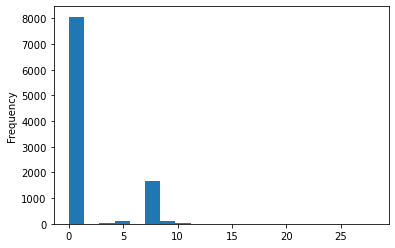

In [22]:
#plot
probs = df.isnull().sum(axis=1)
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=20) # Oooooooh, check out what we can do with a series!

In [23]:
# rows in the 'probs' series whose value is greater than 7
df.drop(probs[probs > 7].index, inplace=True)

In [24]:
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")

Have reduced data frame to: 8188 rows and 37 columns


In [25]:
#Task 3. Fixing the Remaining Data Issues

bools = ['instant_bookable','host_is_superhost']
df.sample(5, random_state=43)[bools]  # only select this two columns

,instant_bookable,host_is_superhost
4993,t,t
9740,f,f
8730,t,f
421,t,f
2225,t,t


In [26]:

# This approach requires us to map 't' and 'f'
# to 'True' and 'False'
map = {'t':True,'f':False}
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace(map).astype('bool')
    

Converting instant_bookable
Converting host_is_superhost


In [27]:
df.sample(5, random_state=43)[bools]

,instant_bookable,host_is_superhost
4993,True,True
9740,False,False
8730,True,False
421,True,False
2225,True,True


In [28]:
dates = ['last_scraped','host_since','first_review','last_review']
df.sample(5, random_state=43)[dates]
#import pandas as pd

,last_scraped,host_since,first_review,last_review
4993,2020-08-26,2013-11-30,2014-12-21,2020-03-01
9740,2020-08-26,2015-04-12,2015-09-05,2015-09-05
8730,2020-08-26,2015-07-04,2015-07-31,2020-03-15
421,2020-08-27,2012-02-27,2016-02-15,2020-03-14
2225,2020-08-26,2013-04-24,2013-09-19,2020-06-03


In [29]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d], infer_datetime_format=True)

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [30]:
df.sample(5, random_state=43)[dates]

,last_scraped,host_since,first_review,last_review
4993,2020-08-26,2013-11-30,2014-12-21,2020-03-01
9740,2020-08-26,2015-04-12,2015-09-05,2015-09-05
8730,2020-08-26,2015-07-04,2015-07-31,2020-03-15
421,2020-08-27,2012-02-27,2016-02-15,2020-03-14
2225,2020-08-26,2013-04-24,2013-09-19,2020-06-03


In [31]:
print(df['last_scraped'].dtypes)
df.sample(5, random_state=43)[dates[0]].dt.strftime('%d/%m/%y')
# Try some other columns and other formats!
print(df[dates[2]].dtype)
df.sample(5, random_state=43)[dates[0]].dt.strftime('%m/%y')

datetime64[ns]
datetime64[ns]


4993    08/20
9740    08/20
8730    08/20
421     08/20
2225    08/20
Name: last_scraped, dtype: object

In [32]:
#Took a random sample (setting the state to 43)
#Took the first column from the dates list (dates[0])
#Used the date accessor
#And called string format time with the format %d/%m/%y

In [33]:
cats = ['property_type','room_type']
df.sample(5, random_state=43)[cats]

,property_type,room_type
4993,Entire apartment,Entire home/apt
9740,Private room in apartment,Private room
8730,Private room in apartment,Private room
421,Private room in townhouse,Private room
2225,Entire apartment,Entire home/apt


In [34]:
df[cats].value_counts()

property_type                       room_type      
Entire apartment                    Entire home/apt    3460
Private room in apartment           Private room       1942
Private room in house               Private room       1258
Entire house                        Entire home/apt     575
Private room in townhouse           Private room        301
Entire townhouse                    Entire home/apt     163
Entire loft                         Entire home/apt      79
Private room in bed and breakfast   Private room         66
Private room in loft                Private room         51
Entire condominium                  Entire home/apt      44
Private room in condominium         Private room         43
Entire serviced apartment           Entire home/apt      19
Entire guest suite                  Entire home/apt      19
Room in serviced apartment          Hotel room           19
Shared room in apartment            Shared room          17
Private room in guest suite         Private room

In [35]:
df[cats[0]].values #get thier unipue name of column

array(['Entire apartment', 'Private room in apartment',
       'Entire apartment', ..., 'Private room in house',
       'Private room in apartment', 'Entire apartment'], dtype=object)

In [36]:
df[cats[1]].value_counts()

Entire home/apt    4391
Private room       3729
Shared room          40
Hotel room           28
Name: room_type, dtype: int64

In [37]:
cats = ['property_type','room_type']
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')   #transform to catagory type.

Converting property_type
Converting room_type


In [38]:
print(df[cats[1]].cat.categories.values)
#str.cat() is used to concatenate strings to the passed caller series of string.

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [39]:

df.sample(5, random_state=43)[cats]

,property_type,room_type
4993,Entire apartment,Entire home/apt
9740,Private room in apartment,Private room
8730,Private room in apartment,Private room
421,Private room in townhouse,Private room
2225,Entire apartment,Entire home/apt


In [40]:
money = ['price']
df.sample(5, random_state=42)[money]

,price
2474,$94.00
4945,$59.00
5753,$33.00
7998,$150.00
1610,$19.00


In [45]:
for m in money:
    #print(f"Converting {m}")
    df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')
#convert $ and , to nothing.
#convert type to float.

In [46]:
money = ['price']
df.sample(5, random_state=42)[money]

,price
2474,94.0
4945,59.0
5753,33.0
7998,150.0
1610,19.0


In [47]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365','calculated_host_listings_count']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:  # if get ValueError, run except.
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
	Converting to unsigned 16-bit integer.
Converting minimum_nights
Converting maximum_nights
Converting availability_365
Converting calculated_host_listings_count


In [48]:
df.beds.isna().value_counts() #?????why t and f

False    8180
True        8
Name: beds, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8188 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8188 non-null   int32         
 1   listing_url                     8188 non-null   object        
 2   last_scraped                    8188 non-null   datetime64[ns]
 3   name                            8187 non-null   object        
 4   description                     8183 non-null   object        
 5   host_id                         8188 non-null   int32         
 6   host_name                       8188 non-null   object        
 7   host_since                      8188 non-null   datetime64[ns]
 8   host_location                   8188 non-null   object        
 9   host_is_superhost               8188 non-null   bool          
 10  host_listings_count             8188 non-null   int32         
 11  host

In [50]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,reviews_per_month
count,8.188000e+03,8.188000e+03,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8180.000000,8188.000000,8188.000000,8.188000e+03,8188.000000,8086.000000,8071.000000,8066.000000,8074.000000,8070.000000,8188.000000,8188.000000
mean,4.142927e+06,1.404152e+07,4.190767,4.190767,51.511304,-0.128860,3.019541,1.669560,99.174228,5.856131,1.868951e+05,153.812897,93.681177,9.327221,9.754029,9.786599,9.504337,3.681119,0.686817
std,2.557183e+06,1.461524e+07,27.119571,27.119571,0.045438,0.085355,1.889357,1.278631,116.162275,26.121070,1.248029e+07,154.486426,7.212115,0.978506,0.611523,0.582510,0.730965,18.989967,0.953299
min,1.155100e+04,6.821000e+03,0.000000,0.000000,51.297330,-0.479620,1.000000,0.000000,12.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,1.723468e+06,2.990243e+06,1.000000,1.000000,51.482940,-0.189820,2.000000,1.000000,45.000000,2.000000,4.000000e+01,0.000000,91.000000,9.000000,10.000000,10.000000,9.000000,1.000000,0.100000
50%,4.216613e+06,9.513450e+06,1.000000,1.000000,51.516650,-0.120560,2.000000,1.000000,75.000000,2.000000,1.125000e+03,90.000000,96.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.340000
75%,6.519377e+06,2.227435e+07,2.000000,2.000000,51.542040,-0.071517,4.000000,2.000000,120.000000,4.000000,1.125000e+03,340.000000,98.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.880000
max,8.333186e+06,3.040751e+08,1111.000000,1111.000000,51.671870,0.238150,16.000000,16.000000,3324.000000,1000.000000,1.000000e+09,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,718.000000,15.170000


In [51]:
df[['price','longitude','latitude']].describe(percentiles=[0.20, 0.80])

,price,longitude,latitude
count,8188.000000,8188.000000,8188.000000
mean,99.174228,-0.128860,51.511304
std,116.162275,0.085355,0.045438
min,12.000000,-0.479620,51.297330
20%,40.000000,-0.199802,51.474242
50%,75.000000,-0.120560,51.516650
80%,132.000000,-0.062590,51.547546
max,3324.000000,0.238150,51.671870


In [52]:
print(f"The mean price is {df.price.mean():0.2f}")
print(f"The median price is {df.price.median():0.2f}")

The mean price is 99.17
The median price is 75.00


In [53]:
# SAVING
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


In [54]:
#SELECTION
#what sort of properties there are in the data set

df.groupby('room_type')['property_type'].value_counts()

room_type        property_type                     
Entire home/apt  Entire apartment                      3460
                 Entire house                           575
                 Entire townhouse                       163
                 Entire loft                             79
                 Entire condominium                      44
                 Entire guest suite                      19
                 Entire serviced apartment               19
                 Entire guesthouse                       10
                 Boat                                     6
                 Entire bungalow                          3
                 Entire cottage                           3
                 Camper/RV                                2
                 Tiny house                               2
                 Campsite                                 1
                 Entire cabin                             1
                 Entire floor                   

In [55]:
pricey = df[(df.room_type=='Entire home/apt') & (df.price>100)]  #selection 

In [56]:
print(f"Selected {pricey.shape[0]} rows")

Selected 2397 rows


In [57]:
df[df.price==df.price.min()][['price','id','listing_url','room_type','description']]

,price,id,listing_url,room_type,description
491,12.0,388700,https://www.airbnb.com/rooms/388700,Private room,A bright room in a 1940's apartment block in M...
9528,12.0,7930974,https://www.airbnb.com/rooms/7930974,Shared room,"1 single bed, Bedroom, shared bathroom and kit..."


In [58]:
df[df.price==df.price.max()][['price','id','listing_url','room_type','description']] 
# pay attention to == sign

,price,id,listing_url,room_type,description
4763,3324.0,4246984,https://www.airbnb.com/rooms/4246984,Entire home/apt,"Spacious living room with separate, fully equi..."


In [79]:
dfr = df[ (df.price > df.price.percentile(0.25)) & (df.price < df.price.percentile(0.75)) ]
print(f"Rows: {dfr.shape[0]}")
print(f"Lower Quartile: {dfr.price.min():>6.2f}") #下四分位数
print(f"Upper Quartile: {dfr.price.max():>6.2f}") #上四分位数
dfr.head(3)

AttributeError: 'Series' object has no attribute 'percentile'

In [78]:
import numpy
print(numpy.__version__)

1.19.2


In [ ]:
#Task 4.4: Deriving a New Variable
# z-score
df['z'] = (df.price - df.price.mean()) / df.price.std()
df.z.describe()